In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC #Support Vector Classification.
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df=pd.read_csv("Height_Weight.csv")
df=df/df.max()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.Height, df.Weight, test_size=0.33, random_state=42)

In [4]:
def sigmoid(x): #activation
  return 1/(1+np.exp(-x))

In [5]:
def square_loss(y_pred, target): #loss
  return np.mean(pow((y_pred - target),2))

In [6]:
lr = 0.01 #learning late
W = np.random.uniform(0,1) # colom 1
b = 0.1
for i in range(5000):
  z = np.dot(X_train, W) + b
y_pred = sigmoid(z)
l = square_loss(y_pred, y_train)
gradient_W = np.dot((y_pred-y_train).T, X_train)/X_train.shape[0]
gradient_b = np.mean(y_pred-y_train)
W = W - lr * gradient_W
b = b - lr* gradient_b

In [7]:
for i in range(len(X_test)):
    r = sigmoid(np.dot(X_test, W) + b)

In [8]:
r

array([0.66692326, 0.68231897, 0.67749808, 0.68151816, 0.6918437 ,
       0.6595017 , 0.68071628, 0.66445837, 0.66937906, 0.66774288,
       0.67345157, 0.6503238 , 0.68710107, 0.67263913, 0.66610264,
       0.66363473, 0.65784162, 0.66033027, 0.68868637, 0.65450988,
       0.66937906, 0.65450988, 0.69263026, 0.68947737, 0.67019562,
       0.6595017 , 0.6503238 , 0.65617767, 0.66115787, 0.66363473,
       0.68471491, 0.67182566, 0.67588262, 0.6949832 , 0.68630678,
       0.67588262, 0.67101115, 0.66033027, 0.65617767, 0.69026725,
       0.68391735, 0.67991332, 0.67669088, 0.67019562, 0.66610264,
       0.67263913, 0.67749808, 0.66528101, 0.67345157, 0.67345157,
       0.6503238 , 0.66774288, 0.68789427, 0.68151816, 0.6511629 ,
       0.68789427, 0.69420001, 0.65283828, 0.65367455, 0.6791093 ,
       0.6595017 , 0.6628101 , 0.68789427, 0.65450988, 0.6831187 ,
       0.68630678, 0.67588262, 0.68868637, 0.67749808, 0.68231897,
       0.66610264, 0.67507331, 0.69026725, 0.6628101 , 0.65116

In [9]:
y_test.head()

361    0.64375
73     0.46875
374    0.59375
155    0.64375
104    0.87500
Name: Weight, dtype: float64

In [10]:
data = pd.read_csv("apples_and_oranges.csv")

In [11]:
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [12]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [13]:
classifier = SVC(kernel='linear', random_state = 1) #linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=1)

In [14]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

['orange' 'orange' 'apple' 'apple' 'orange' 'apple' 'orange' 'apple']


In [15]:
test_set["Predictions"] = Y_pred
print(test_set["Predictions"])

2     orange
31    orange
3      apple
21     apple
27    orange
29     apple
22    orange
39     apple
Name: Predictions, dtype: object


<ipython-input-15-760cf4df8eeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["Predictions"] = Y_pred


In [16]:
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.875


In [17]:
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [18]:
classifier = SVC(kernel='linear', random_state = 3) 
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=3)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


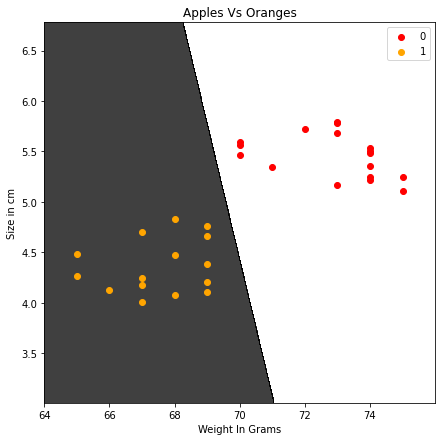

In [19]:

plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('white', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


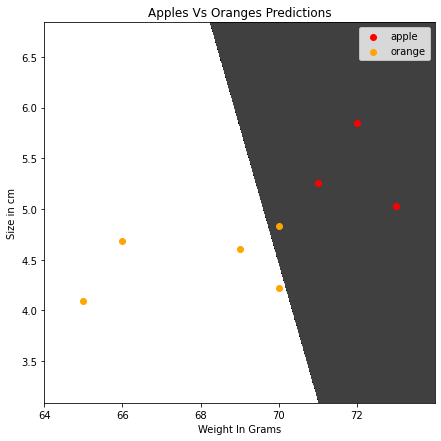

In [20]:
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()